In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Load the dataset

breast_cancer_df = pd.read_csv('breast-cancer.csv')

# Display first 5 rows
print(breast_cancer_df.head())


   Unnamed: 0                 Class    Age Menopause Tumor-size Inv-nodes  \
0           0  no-recurrence-events  30-39   premeno      30-34       0-2   
1           1  no-recurrence-events  40-49   premeno      20-24       0-2   
2           2  no-recurrence-events  40-49   premeno      20-24       0-2   
3           3  no-recurrence-events  60-69      ge40      15-19       0-2   
4           4  no-recurrence-events  40-49   premeno        0-4       0-2   

  Node-caps  Deg-malig Breast Breast-quad Irradiat  
0        no          3   left    left_low       no  
1        no          2  right    right_up       no  
2        no          2   left    left_low       no  
3        no          2  right     left_up       no  
4        no          2  right   right_low       no  


In [ ]:
# Display dataset information
breast_cancer_df.info()

# Statistical summary of numerical features
summary_statistics = breast_cancer_df.describe()
print(summary_statistics)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   286 non-null    int64 
 1   Class        286 non-null    object
 2   Age          286 non-null    object
 3   Menopause    286 non-null    object
 4   Tumor-size   286 non-null    object
 5   Inv-nodes    286 non-null    object
 6   Node-caps    286 non-null    object
 7   Deg-malig    286 non-null    int64 
 8   Breast       286 non-null    object
 9   Breast-quad  286 non-null    object
 10  Irradiat     286 non-null    object
dtypes: int64(2), object(9)
memory usage: 24.7+ KB
       Unnamed: 0   Deg-malig
count    286.0000  286.000000
mean     142.5000    2.048951
std       82.7053    0.738217
min        0.0000    1.000000
25%       71.2500    2.000000
50%      142.5000    2.000000
75%      213.7500    3.000000
max      285.0000    3.000000


In [ ]:
# Check for missing values
missing_values = breast_cancer_df.isnull().sum()
print("Missing Values:\n", missing_values)

# If any missing values exist, handle them
breast_cancer_df = breast_cancer_df.dropna()  # Drop missing values


Missing Values:
 Unnamed: 0     0
Class          0
Age            0
Menopause      0
Tumor-size     0
Inv-nodes      0
Node-caps      0
Deg-malig      0
Breast         0
Breast-quad    0
Irradiat       0
dtype: int64


<ipython-input-4-d200c9054bad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=breast_cancer_df['Class'], palette="coolwarm")


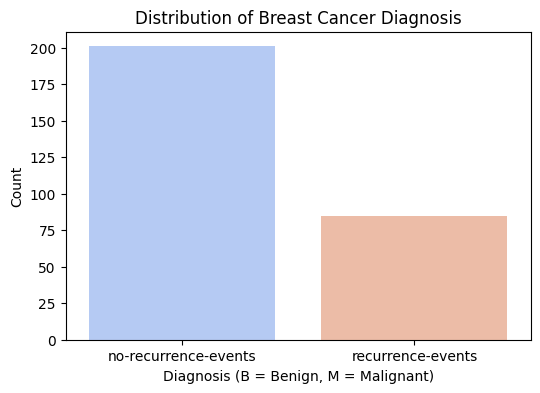

In [ ]:
# Countplot for the diagnosis column
plt.figure(figsize=(6, 4))
sns.countplot(x=breast_cancer_df['Class'], palette="coolwarm")


plt.title("Distribution of Breast Cancer Diagnosis")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Count")
plt.show()

<ipython-input-5-b08545df06e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Breast-quad', data=breast_cancer_df, palette="viridis")


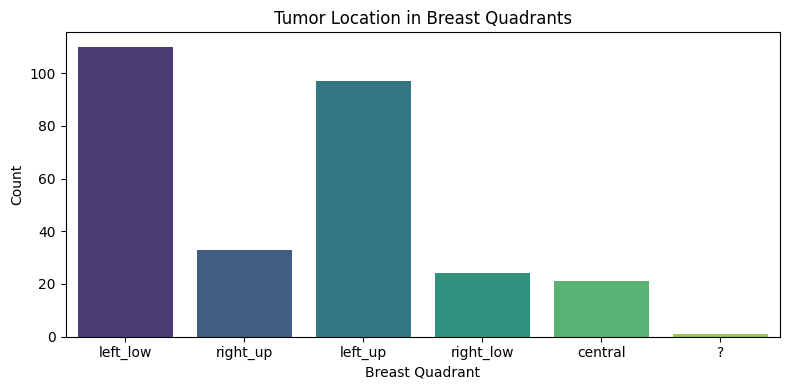

In [ ]:
# 2. Countplot for Breast Quadrant
plt.figure(figsize=(8, 4))
sns.countplot(x='Breast-quad', data=breast_cancer_df, palette="viridis")
plt.title("Tumor Location in Breast Quadrants")
plt.xlabel("Breast Quadrant")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


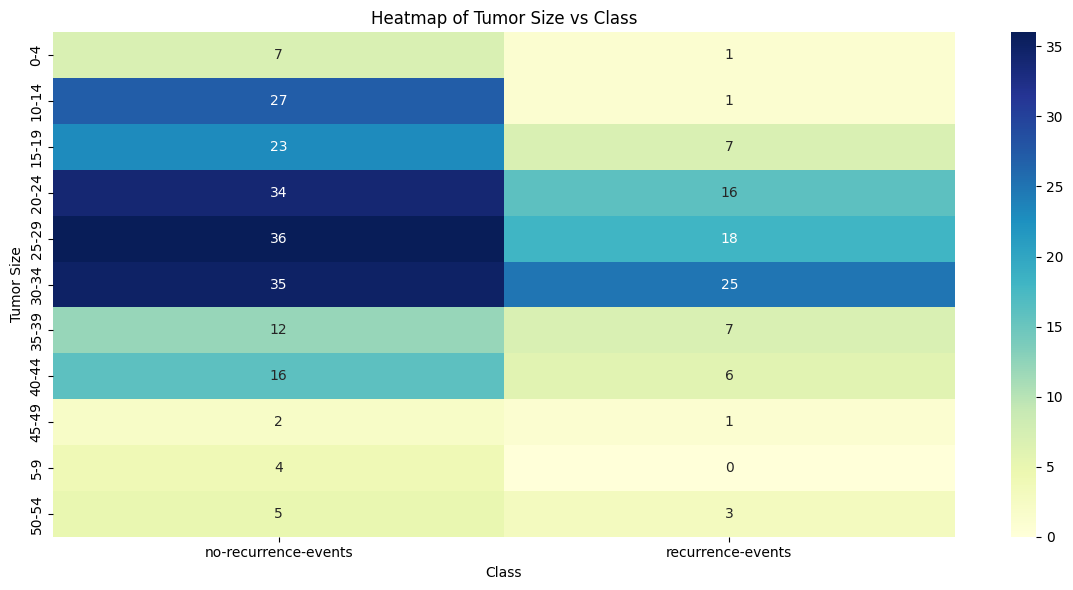

In [ ]:
# Heatmap of Tumor-size vs Class
tumor_class_crosstab = pd.crosstab(breast_cancer_df['Tumor-size'], breast_cancer_df['Class'])
plt.figure(figsize=(12, 6))
sns.heatmap(tumor_class_crosstab, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Heatmap of Tumor Size vs Class")
plt.xlabel("Class")
plt.ylabel("Tumor Size")
plt.tight_layout()
plt.show()

<ipython-input-8-d372e79d06ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Deg-malig', data=breast_cancer_df, palette="Set2")


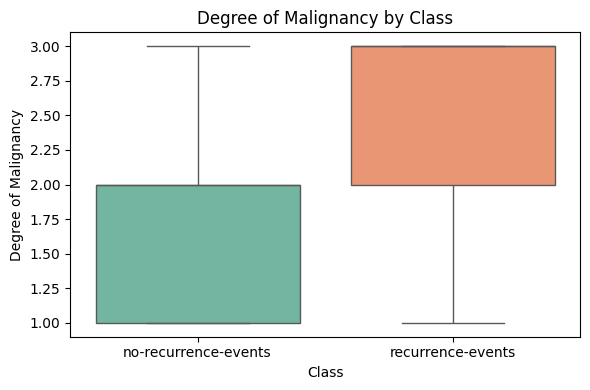

In [ ]:
# . Boxplot for Degree of Malignancy by Class
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Deg-malig', data=breast_cancer_df, palette="Set2")
plt.title("Degree of Malignancy by Class")
plt.xlabel("Class")
plt.ylabel("Degree of Malignancy")
plt.tight_layout()
plt.show()

In [ ]:
# Drop 'Unnamed: 0' column if present
if 'Unnamed: 0' in breast_cancer_df.columns:
    breast_cancer_df.drop(columns=['Unnamed: 0'], inplace=True)

# Encode categorical columns
encoded_df = breast_cancer_df.copy()
label_encoders = {}
for col in encoded_df.columns:
    if encoded_df[col].dtype == 'object':
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(encoded_df[col])
        label_encoders[col] = le

# Define features and target
X = encoded_df.drop('Class', axis=1)
y = encoded_df['Class']

# Scale the features (recommended for SVM and MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train & evaluate
for name, model in models.items():
    print(f"\n {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Decision Tree
Accuracy: 0.603448275862069
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72        41
           1       0.33      0.35      0.34        17

    accuracy                           0.60        58
   macro avg       0.53      0.53      0.53        58
weighted avg       0.61      0.60      0.61        58

Confusion Matrix:
 [[29 12]
 [11  6]]

 Random Forest
Accuracy: 0.7068965517241379
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.50      0.41      0.45        17

    accuracy                           0.71        58
   macro avg       0.64      0.62      0.63        58
weighted avg       0.69      0.71      0.70        58

Confusion Matrix:
 [[34  7]
 [10  7]]

 Support Vector Machine
Accuracy: 0.7413793103448276
Classification Report:
               precision    recall  f1-score   support



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Auto tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for selected models
param_grids = {
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "Neural Network (MLP)": {
        "hidden_layer_sizes": [(50,), (100,), (100, 50)],
        "activation": ["relu", "tanh"],
        "alpha": [0.0001, 0.001],
        "learning_rate": ["constant", "adaptive"]
    }
}

# Models to tune (reuse your dictionary or redefine)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models_to_tune = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Neural Network (MLP)": MLPClassifier(max_iter=500, random_state=42)
}

# Perform GridSearchCV
best_estimators = {}

print("\n🔧 Running GridSearchCV...")
for name, model in models_to_tune.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_scaled, y)

    print(" Best Parameters:", grid.best_params_)
    print(" Best Cross-Validated Accuracy:", grid.best_score_)

    best_estimators[name] = grid.best_estimator_



🔧 Running GridSearchCV...

Tuning Decision Tree...
✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
📊 Best Cross-Validated Accuracy: 0.6678765880217785

Tuning Random Forest...
✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}
📊 Best Cross-Validated Accuracy: 0.7099213551119178

Tuning Support Vector Machine...
✅ Best Parameters: {'C': 1, 'kernel': 'rbf'}
📊 Best Cross-Validated Accuracy: 0.702843315184513

Tuning Neural Network (MLP)...
✅ Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
📊 Best Cross-Validated Accuracy: 0.6959467634603751


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


       Feature  Importance
5    Deg-malig    0.195905
3    Inv-nodes    0.162482
2   Tumor-size    0.153025
4    Node-caps    0.135771
7  Breast-quad    0.101232
0          Age    0.087392
6       Breast    0.062741
8     Irradiat    0.061816
1    Menopause    0.039636


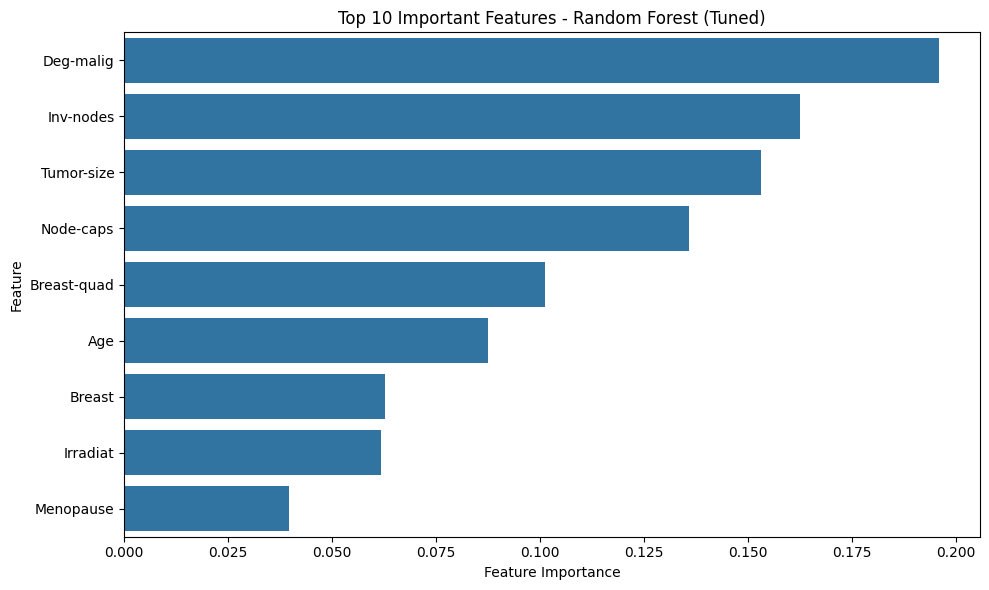

In [ ]:
#  Feature Importance from Random Forest (best-tuned model)
# Assumes X is your DataFrame before scaling

importances = best_estimators["Random Forest"].feature_importances_
feature_names = X.columns  # original feature names (before scaling)

# Create DataFrame of importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(importances_df.head(10))

# Plot top 10 important features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances_df.head(10))
plt.title("Top 10 Important Features - Random Forest (Tuned)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


       Feature  Importance
5    Deg-malig    0.333992
3    Inv-nodes    0.210624
2   Tumor-size    0.135946
4    Node-caps    0.120093
0          Age    0.072654
7  Breast-quad    0.048058
8     Irradiat    0.043934
1    Menopause    0.034700
6       Breast    0.000000


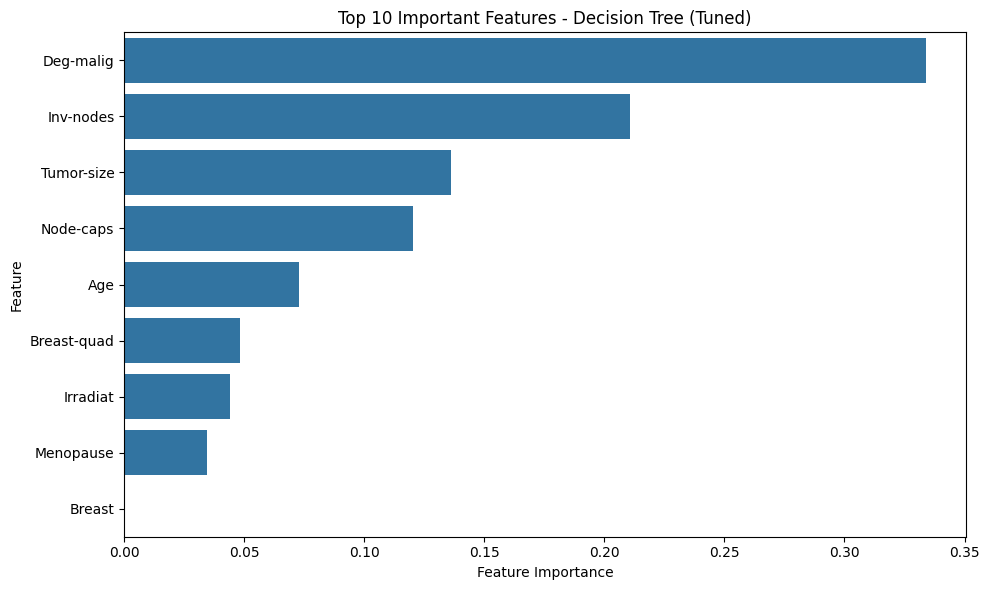

In [ ]:
#  Feature Importance from Decision Tree (best-tuned model)
importances_dt = best_estimators["Decision Tree"].feature_importances_
feature_names = X.columns

# Create DataFrame of importances
dt_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_dt
}).sort_values(by='Importance', ascending=False)

# Display top features
print(dt_importance_df.head(10))

#  Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=dt_importance_df.head(10))
plt.title("Top 10 Important Features - Decision Tree (Tuned)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
